In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm
tqdm.pandas()

In [3]:
df     = pd.read_csv('../../data/cleaned/NFL_wk_by_wk_cleaned.csv')
df     = df.loc[:,['YEAR','WEEK_NUM','WINNER','LOSER','WIN_OR_TIE']]

df_elo = pd.read_csv('../../data/cleaned/NFL_Team_Elo.csv')

In [4]:
df.head()

,YEAR,WEEK_NUM,WINNER,LOSER,WIN_OR_TIE
0,1991-1992,1,Kansas City Chiefs,Atlanta Falcons,1.0
1,1991-1992,1,Dallas Cowboys,Cleveland Browns,1.0
2,1991-1992,1,Philadelphia Eagles,Green Bay Packers,1.0
3,1991-1992,1,New Orleans Saints,Seattle Seahawks,1.0
4,1991-1992,1,New York Jets,Tampa Bay Buccaneers,1.0


In [5]:
df_elo.head()

,NFL_TEAM,NFL_YEAR,NFL_WEEK,ELO
0,Arizona Cardinals,1991-1992,1,1500.0
1,Atlanta Falcons,1991-1992,1,1500.0
2,Buffalo Bills,1991-1992,1,1500.0
3,Chicago Bears,1991-1992,1,1500.0
4,Cincinnati Bengals,1991-1992,1,1500.0


In [9]:
df = pd.merge(df, df_elo, how='left', left_on=['YEAR','WEEK_NUM','WINNER'], right_on=['NFL_YEAR','NFL_WEEK','NFL_TEAM']).drop(['NFL_TEAM','NFL_YEAR','NFL_WEEK'], axis=1).merge(df_elo, how='left', left_on=['YEAR','WEEK_NUM','LOSER'], right_on=['NFL_YEAR','NFL_WEEK','NFL_TEAM']).drop(['NFL_TEAM','NFL_YEAR','NFL_WEEK'], axis=1)
df.head()

,YEAR,WEEK_NUM,WINNER,LOSER,WIN_OR_TIE,ELO_x,ELO_y
0,1991-1992,1,Kansas City Chiefs,Atlanta Falcons,1.0,1500.0,1500.0
1,1991-1992,1,Dallas Cowboys,Cleveland Browns,1.0,1500.0,1500.0
2,1991-1992,1,Philadelphia Eagles,Green Bay Packers,1.0,1500.0,1500.0
3,1991-1992,1,New Orleans Saints,Seattle Seahawks,1.0,1500.0,1500.0
4,1991-1992,1,New York Jets,Tampa Bay Buccaneers,1.0,1500.0,1500.0


In [11]:
df['ELO_CORRECT'] = df.apply(lambda row: 1 if row.ELO_x > row.ELO_y else 0, axis=1)
df.head()

,YEAR,WEEK_NUM,WINNER,LOSER,WIN_OR_TIE,ELO_x,ELO_y,ELO_CORRECT
0,1991-1992,1,Kansas City Chiefs,Atlanta Falcons,1.0,1500.0,1500.0,0
1,1991-1992,1,Dallas Cowboys,Cleveland Browns,1.0,1500.0,1500.0,0
2,1991-1992,1,Philadelphia Eagles,Green Bay Packers,1.0,1500.0,1500.0,0
3,1991-1992,1,New Orleans Saints,Seattle Seahawks,1.0,1500.0,1500.0,0
4,1991-1992,1,New York Jets,Tampa Bay Buccaneers,1.0,1500.0,1500.0,0


In [24]:
temp = df.groupby(['YEAR','WEEK_NUM']).agg({'WEEK_NUM':'count','ELO_CORRECT':'sum'})
temp['%'] = (temp['ELO_CORRECT'] / temp['WEEK_NUM']) * 100
temp.head()

WEEK_NUM  ELO_CORRECT          %
YEAR      WEEK_NUM                                  
1991-1992 1               14            0   0.000000
          2               14            2  14.285714
          3               14            7  50.000000
          4               14            8  57.142857
          5               12            7  58.333333

<Axes: >

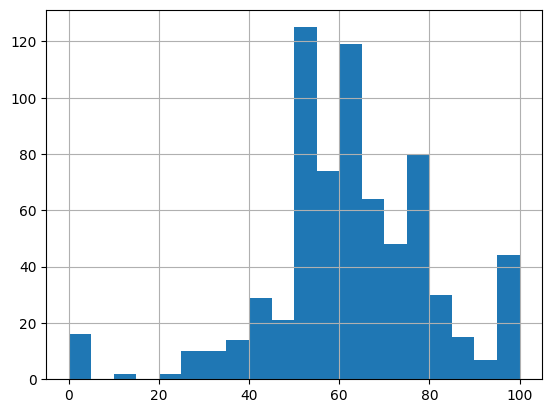

In [33]:
temp['%'].hist(bins=20)

<Axes: xlabel='YEAR,WEEK_NUM'>

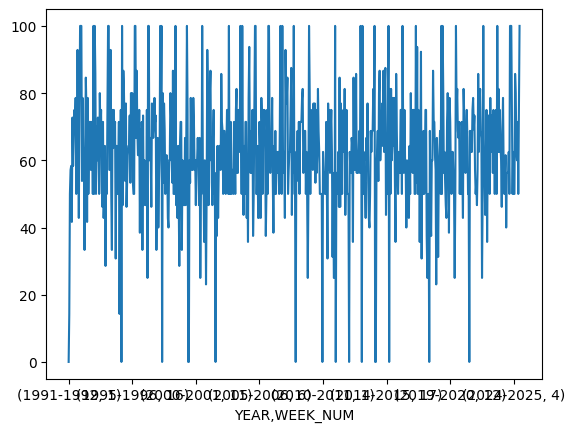

In [31]:
temp['%'].plot.line()